# <font color = "blue">Preambule</font>

This notebook was made with the purpose of show to more people that Keras gives ten different layers which could be used to do **data augmentation** of images from this competition. I would to add that it would be nice if you comment why **albumentations** is a better option besides the fact that it provides with more methods, like **Color Jitter**. One advantage of using Keras layers is that it would be faster than algumentation because they can use GPU and TPU processors.

# <font color = "blue">Libraries</font>

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental import preprocessing

### Make prettier the prints ###
from colorama import Fore
b_ = Fore.BLUE
r_ = Fore.RED

# <font color = "blue">Reproducibility</font>

In [2]:
seed = 42
tf.random.set_seed(seed)
random.seed(seed)
np.random.seed(seed)

# <font color = "blue">Data</font>

In [3]:
BASE_PATH = "../input/hubmap-256x256"
train = os.path.join(BASE_PATH, "train")
masks = os.path.join(BASE_PATH, "masks")

print(f'{b_}Number of training images: {r_}{len(os.listdir(train))}')
print(f'{b_}Numner of masks: {r_}{len(os.listdir(masks))}')

Number of training images: 3676
Numner of masks: 3676


Text(0.5, 1.0, 'Mask')

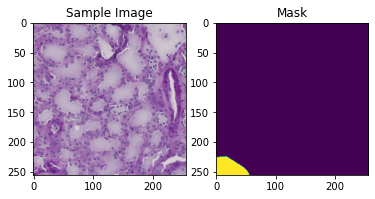

In [4]:
sample_filename = os.listdir(train)[6]
sample_image = plt.imread(os.path.join(train, sample_filename))
sample_mask = plt.imread(os.path.join(masks, sample_filename))

_, ax = plt.subplots(1, 2)
ax[0].imshow(sample_image)
ax[0].set_title("Sample Image")
ax[1].imshow(sample_mask)
ax[1].set_title("Mask")

# <font color = "blue">Image Preprocessing & Augmentation Layers</font>

In [5]:
def plot_ori_and_aug(aug):
    """
    Plot the original sample image with its augmentation
    """
    plt.figure(figsize=(10, 10))
    _, ax = plt.subplots(1, 2)
    ax[0].imshow(sample_image)
    ax[0].set_title("Original")
    ax[1].imshow(augmented_image[0])
    ax[1].set_title(aug);

## <font color = "green"> Resizing layer</font>

```
tf.keras.layers.experimental.preprocessing.Resizing(
    height, width, interpolation="bilinear", name=None, **kwargs
)
```

You can prove that it worked seeing the axes of the images.

<Figure size 720x720 with 0 Axes>

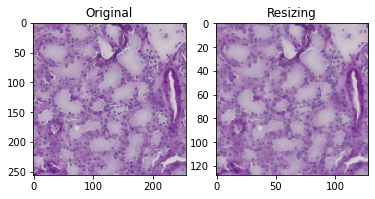

In [6]:
# Add the image to a batch
image = tf.expand_dims(sample_image, 0) # I don't fully understand why this line is necesary but i can't replace it
augmented_image = preprocessing.Resizing(128, 128, interpolation = "bilinear")(image)

plot_ori_and_aug("Resizing")


## <font color = "green">Rescaling layer</font>

```
tf.keras.layers.experimental.preprocessing.Rescaling(
    scale, offset=0.0, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

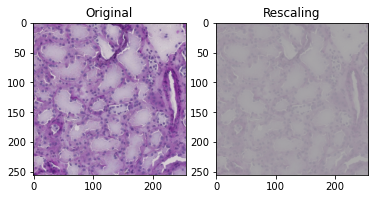

In [7]:
augmented_image = preprocessing.Rescaling(1./5, offset = 0.5)(image)

plot_ori_and_aug("Rescaling")

## <font color = "green">CenterCrop layer</font>
```
tf.keras.layers.experimental.preprocessing.CenterCrop(
    height, width, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

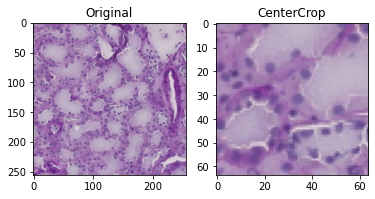

In [8]:
augmented_image = preprocessing.CenterCrop(height = 64, width = 64)(image)

plot_ori_and_aug("CenterCrop")

## <font color = "green">RandomCrop layer</font>

```
tf.keras.layers.experimental.preprocessing.RandomCrop(
    height, width, seed=None, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

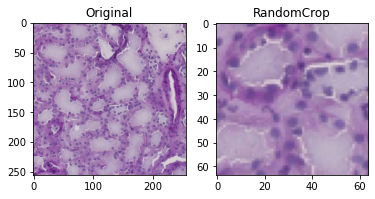

In [9]:
augmented_image = preprocessing.RandomCrop(height = 64, width = 64, seed = seed)(image)

plot_ori_and_aug("RandomCrop")

## <font color = "green">RandomFlip layer</font>

```
tf.keras.layers.experimental.preprocessing.RandomFlip(
    mode="horizontal_and_vertical", seed=None, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

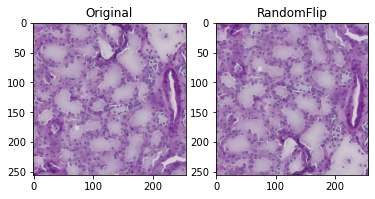

In [10]:
# Here i used "seed + 1" because 42 retuns exactly the same image.
augmented_image = preprocessing.RandomFlip("horizontal_and_vertical", seed = seed + 1)(image)

plot_ori_and_aug("RandomFlip")

## <font color = "green"> RandomTranslation layer</font>

```
tf.keras.layers.experimental.preprocessing.RandomTranslation(
    height_factor,
    width_factor,
    fill_mode="reflect",
    interpolation="bilinear",
    seed=None,
    name=None,
    fill_value=0.0,
    **kwargs
)
```

<Figure size 720x720 with 0 Axes>

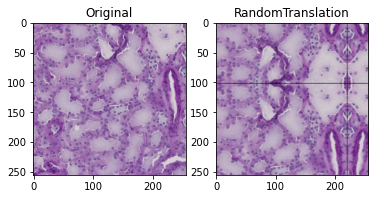

In [11]:
augmented_image = preprocessing.RandomTranslation(
    height_factor = 0.8,
    width_factor = 0.6,
    fill_mode = "reflect",
    interpolation = "bilinear",
    seed = seed
)(image)

plot_ori_and_aug("RandomTranslation")

## <font color = "green">RandomRotation layer</font>

```
tf.keras.layers.experimental.preprocessing.RandomRotation(
    factor,
    fill_mode="reflect",
    interpolation="bilinear",
    seed=None,
    name=None,
    fill_value=0.0,
    **kwargs
)
```

<Figure size 720x720 with 0 Axes>

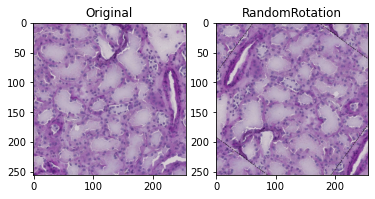

In [12]:
augmented_image = preprocessing.RandomRotation(
    factor = 0.8,
    fill_mode = "wrap",
    interpolation = "nearest",
    seed = seed,
)(image)

plot_ori_and_aug("RandomRotation")

## <font color = "green">RandomZoom layer</font>


```
tf.keras.layers.experimental.preprocessing.RandomZoom(
    height_factor,
    width_factor=None,
    fill_mode="reflect",
    interpolation="bilinear",
    seed=None,
    name=None,
    fill_value=0.0,
    **kwargs
)
```

<Figure size 720x720 with 0 Axes>

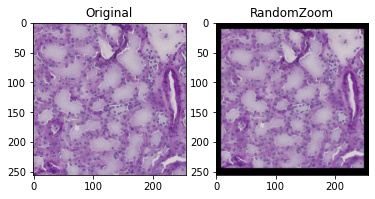

In [13]:
augmented_image = preprocessing.RandomZoom(
    height_factor = 0.2,
    width_factor = -0.3,
    fill_mode = "constant",
    interpolation = "bilinear",
    seed = seed
)(image)

plot_ori_and_aug("RandomZoom")

## <font color = "green">RandomHeight layer</font>


```
tf.keras.layers.experimental.preprocessing.RandomHeight(
    factor, interpolation="bilinear", seed=None, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

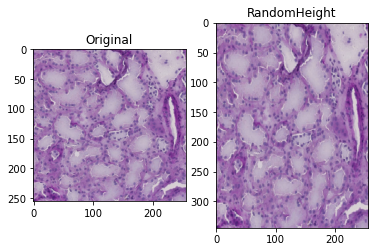

In [14]:
augmented_image = preprocessing.RandomHeight(
    factor = 0.7,
    interpolation = "nearest",
    seed = seed
)(image)

plot_ori_and_aug("RandomHeight")

## <font color = "green">RandomWidth layer</font>

```
tf.keras.layers.experimental.preprocessing.RandomWidth(
    factor, interpolation="bilinear", seed=None, name=None, **kwargs
)
```

<Figure size 720x720 with 0 Axes>

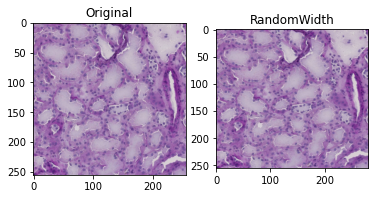

In [15]:
augmented_image = preprocessing.RandomWidth(
    factor = 0.2,
    interpolation = "bicubic",
    seed = seed
)(image)

plot_ori_and_aug("RandomWidth")

## <font color = "green">Combining Layersr</font>


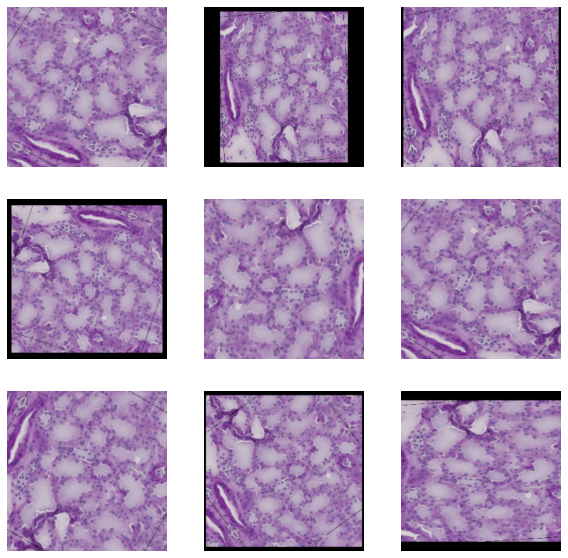

In [16]:
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal_and_vertical"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(
        height_factor = 0.2,
        width_factor = -0.3,
        fill_mode = "constant",
        interpolation = "bilinear",
    )    
])

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

# <font color = "blue">References</font>
- [
Image preprocessing & augmentation layers](https://keras.io/api/layers/preprocessing_layers/image_preprocessing/)
- [
Data Augmentation in Python: Everything You Need to Know](https://neptune.ai/blog/data-augmentation-in-python)
- [[Tutorial]Augmentation with mask & Visualization🔥](https://www.kaggle.com/piantic/tutorial-augmentation-with-mask-visualization)
- [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)